# Analiza Componentelor Principale (ACP)
* Scopul analizei este de a **reduce dimensionalitatea** setului de date (13 variabile numerice) la câteva componente principale care explică cea mai mare parte a variației.
* ACP caută să grupeze variabilele inițiale în combinații liniare astfel încât să maximizeze dispersia (variația) explicată de fiecare componentă. Prima componentă principală explică cea mai mare parte din varianță, a doua cea mai mare parte din variația rămasă, și așa mai departe.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb

from utils import toDataFrame,replaceNan

masini=pd.read_csv('SET DE DATE/Specificatii masini 2023.csv',index_col=(0,1))
replaceNan(masini)
variabile_numerice=masini.columns[2:].tolist()
x_orig=masini[variabile_numerice].values
m,n=x_orig.shape
masini.head()

Segment      Fuel  \
Company    Model                                                       
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)        Compact  Gasoline   
           ALFA ROMEO Giulia (2022-Present)        Compact    Diesel   
           2023 Alfa Romeo Stelvio              Medium SUV  Gasoline   
           2023 Alfa Romeo Stelvio              Medium SUV    Diesel   
           ALFA ROMEO Giulietta (2016-Present)     Compact  Gasoline   

                                                Power(HP)  Torque(Nm)  \
Company    Model                                                        
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)         280.0       400.0   
           ALFA ROMEO Giulia (2022-Present)         210.0       470.0   
           2023 Alfa Romeo Stelvio                  280.0       400.0   
           2023 Alfa Romeo Stelvio                  210.0       470.0   
           ALFA ROMEO Giulietta (2016-Present)      120.0       215.0   

                                                Displacement  Length  Width  \
Company    Model                                                              
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)           1995.0   183.1   73.2   
           ALFA ROMEO Giulia (2022-Present)           2143.0   183.1   73.2   
           2023 Alfa Romeo Stelvio                    1995.0   184.5   74.9   
           2023 Alfa Romeo Stelvio                    2143.0   184.5   74.9   
           ALFA ROMEO Giulietta (2016-Present)        1368.0   171.3   70.8   

                                                Height  Wheelbase  \
Company    Model                                                    
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)       56.6      111.0   
           ALFA ROMEO Giulia (2022-Present)       56.6      111.0   
           2023 Alfa Romeo Stelvio                66.7      110.9   
           2023 Alfa Romeo Stelvio                66.7      110.9   
           ALFA ROMEO Giulietta (2016-Present)    57.7      103.7   

                                                Cargo Volume  Unladen Weight  \
Company    Model                                                               
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)             17.0          3406.0   
           ALFA ROMEO Giulia (2022-Present)             17.0          3450.0   
           2023 Alfa Romeo Stelvio                      18.5          3704.0   
           2023 Alfa Romeo Stelvio                      18.5          3847.0   
           ALFA ROMEO Giulietta (2016-Present)          12.4          2987.0   

                                                Top Speed  \
Company    Model                                            
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)         149.0   
           ALFA ROMEO Giulia (2022-Present)         146.0   
           2023 Alfa Romeo Stelvio                  143.0   
           2023 Alfa Romeo Stelvio                  134.0   
           ALFA ROMEO Giulietta (2016-Present)      121.0   

                                                Acceleration 0-62 Mph (0-100 kph)  \
Company    Model                                                                    
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)                                   5.2   
           ALFA ROMEO Giulia (2022-Present)                                   6.8   
           2023 Alfa Romeo Stelvio                                            5.7   
           2023 Alfa Romeo Stelvio                                            6.6   
           ALFA ROMEO Giulietta (2016-Present)                                9.4   

                                                Combined mpg  Fuel capacity  
Company    Model                                                             
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)             30.5           15.3  
           ALFA ROMEO Giulia (2022-Present)             42.8           15.3  
           2023 Alfa Romeo Stelvio                      28.0           16.9  
           2023 Alfa 

print(f"Sunt {m} observatii ce includ marci de masini si {n} coloane/variabile")

## Crearea modelului

In [5]:
x=StandardScaler().fit_transform(x_orig)
model_acp=PCA()
model_acp.fit(x)

PCA()

## Valori proprii/Alpha/Varianța explicată de fiecare componentă

In [6]:
alpha=model_acp.explained_variance_
print("Valorile proprii/varianta fiecarei componente este: ", alpha)

Valorile proprii/varianta fiecarei componente este:  [6.96435453 2.26690602 0.98955036 0.63161412 0.54100502 0.50075327
 0.28732088 0.22388645 0.18533731 0.14283388 0.11277898 0.09043264
 0.07090976]


Se observă că **prima componentă (C1)** explică cea mai mare variație (~ 6.96), urmată de C2 (~ 2.27). După C3, valorile scad semnificativ sub 1, ceea ce indică faptul că acele componente aduc o contribuție mică. Cea de-a treia componenta, cu valoarea de 0.98 nu este la limita semnificativă.

## Calculul Componentelor Principale
Transformăm datele originale în coordonate noi (scoruri) pe axele C1, C2, C3, etc. Aceste valori ne vor permite să plasăm fiecare mașină pe grafic pentru a vizualiza poziția ei în piață.

In [7]:
eticheteComponente=['C'+str(i+1) for i in range(len(alpha))]
c=model_acp.transform(x)
cDf=toDataFrame(c,masini.index,eticheteComponente,'Componente.csv')
cDf.head()

C1        C2        C3  \
Company    Model                                                               
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     1.321279  1.021483  0.224321   
           ALFA ROMEO Giulia (2022-Present)     1.009918  0.632814  0.771967   
           2023 Alfa Romeo Stelvio              1.789284 -0.453272 -0.777789   
           2023 Alfa Romeo Stelvio              1.550385 -0.862583 -0.421199   
           ALFA ROMEO Giulietta (2016-Present) -1.573209  0.364378 -0.427526   

                                                      C4        C5        C6  \
Company    Model                                                               
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)    -0.922148  0.344748 -0.015362   
           ALFA ROMEO Giulia (2022-Present)    -0.307345  0.124322  0.163950   
           2023 Alfa Romeo Stelvio             -0.143061  0.576998 -0.317647   
           2023 Alfa Romeo Stelvio              0.405262  0.365478 -0.130870   
           ALFA ROMEO Giulietta (2016-Present) -0.358834 -0.634031  0.135516   

                                                      C7        C8        C9  \
Company    Model                                                               
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)    -0.567868 -0.054369  0.104751   
           ALFA ROMEO Giulia (2022-Present)    -0.133658  0.192471 -0.374680   
           2023 Alfa Romeo Stelvio             -0.966595 -0.447482  0.150683   
           2023 Alfa Romeo Stelvio             -0.679218 -0.159165 -0.386176   
           ALFA ROMEO Giulietta (2016-Present) -0.113701 -0.494825 -0.138510   

                                                     C10       C11       C12  \
Company    Model                                                               
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     0.198150 -0.175542 -0.382978   
           ALFA ROMEO Giulia (2022-Present)     0.212195 -0.310756 -0.155547   
           2023 Alfa Romeo Stelvio              0.166518 -0.338365 -0.170042   
           2023 Alfa Romeo Stelvio              0.119912 -0.308676 -0.297929   
           ALFA ROMEO Giulietta (2016-Present)  0.212681 -0.048388 -0.420682   

                                                     C13  
Company    Model                                          
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)    -0.058462  
           ALFA ROMEO Giulia (2022-Present)    -0.051786  
           2023 Alfa Romeo Stelvio              0.262326  
           2023 Alfa Romeo Stelvio              0.269200  
           ALFA ROMEO Giulietta (2016-Present) -0.107976

Aceste valori reprezintă noile coordonate ale mașinilor pe axele abstracte C1, C2 etc. Să luăm exemplul mărcii *Alfa Romeo*:
1.  **Alfa Romeo Giulietta ("Compacta"):**
    *   *C1 = -1.57:* Valoarea puternic negativă confirmă statutul de mașină mică și economică (opusă "Masivității").
    *   *C2 = 0.36:* Valoare ușor pozitivă, indicând o oarecare agilitate sportivă specifică mărcii, dar moderată.
2.  **Alfa Romeo Stelvio ("SUV-ul"):**
    *   *C1 = 1.79:* Valoare mare pozitivă. Asta o plasează clar în zona mașinilor masive și puternice.
    *   *C2 = -0.45:* Valoarea negativă trădează natura de SUV (centru de greutate înalt, masă mare), opusă agilității pure de coupe.
3.  **Alfa Romeo Giulia ("Sedan-ul Sport"):**
    *   *C1 = 1.32:* Pozitivă (e o mașină premium), dar mai mică decât Stelvio (1.79), logic.
    *   *C2 = 1.02:* Valoare clar pozitivă! Aici se vede diferența față de Stelvio: deși au motoare similare, Giulia este mult mai "sportivă" și agilă în interpretarea algoritmului.

## Analiza Corelațiilor (Factor Loadings)
Acest tabel ne arată legătura dintre variabilele originale (Putere, Preț etc.) și noile Componente.
*   Valorile mari (aproape de 1 sau -1) indică variabilele care definesc cel mai puternic acea axă.
*   Ne ajută să punem o "etichetă" pe fiecare componentă (de exemplu: dacă C1 are corelație mare cu "Length" și "Weight", atunci C1 reprezintă "Dimensiunea").

In [11]:
r_x_c=np.corrcoef(x,c,rowvar=False)[:n,n:]
rxcDf=toDataFrame(r_x_c,variabile_numerice,eticheteComponente,'Corelatii.csv')
rxcDf.head(13)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
Power(HP),0.814474,0.365465,-0.127087,0.123223,0.205082,-0.020645,0.087132,0.012325,0.317797,0.124086,0.069074,-0.014780,-0.011105
Torque(Nm),0.869956,0.178663,0.024017,0.226044,0.154719,0.069270,0.046577,0.190202,-0.228316,0.193805,-0.045679,-0.015762,0.021853
Displacement,0.847580,0.260811,-0.160046,0.178079,0.010175,0.139114,0.234409,0.093991,-0.004479,-0.264654,-0.047065,0.000962,0.027269
Length,0.821955,-0.334037,0.224132,-0.210457,-0.238520,0.093640,-0.029608,0.081370,0.058958,0.022590,0.065750,0.030456,0.189435
Width,0.715371,-0.208573,0.064254,0.040072,-0.143010,-0.639872,0.079178,0.028410,-0.012099,-0.017514,-0.028333,-0.025701,-0.011280
Height,0.149171,-0.782814,-0.399008,0.327670,0.199117,-0.030418,-0.194662,-0.055157,0.040147,-0.023198,-0.080360,0.062281,0.066193
Wheelbase,0.790286,-0.418625,0.217193,-0.117809,-0.130120,0.156663,-0.144458,0.163759,0.110191,-0.011711,-0.142173,-0.028053,-0.129269
Cargo Volume,0.332811,-0.705683,0.168827,-0.334932,0.450664,0.017693,0.200011,-0.061627,-0.042873,-0.015512,0.026141,-0.016175,-0.018123
Unladen Weight,0.892746,-0.256522,0.027455,0.184056,-0.068003,0.052316,-0.117008,-0.023016,-0.083419,-0.055112,0.246737,0.034974,-0.094286
Top Speed,0.772776,0.504872,0.200068,-0.131770,0.095191,-0.050795,-0.071808,-0.127605,-0.025827,-0.007971,-0.071648,0.226615,-0.015221


Tabelul ne arată "rețeta" fiecărei componente principale, adică din ce variabile este compusă:

1.  **Componenta 1 (C1) - "Axa de Putere și Masivitate":**
    *   Este dominată de *Greutate (0.89)*, *Cuplu (0.87)*, *Cilindree (0.85)* și *Dimensiuni (Lungime 0.82, Ampatament 0.79)*.
    *   Toate au valori pozitive mari. C1 crește odată cu mașina: cu cât e mai mare, mai grea și mai puternică, cu atât C1 e mai mare.
    *   *Accelerația* e negativă (-0.78), confirmând că mașinile cu C1 mare sunt și rapide (timp mic 0-100).

2.  **Componenta 2 (C2) - "Axa de Formă: Sportivitate vs. Utilitate":**
    *   Aici vedem opoziția interesantă.
    *   Valori Negative: Corelate puternic cu *Înălțimea (-0.78)* și *Volumul Portbagajului (-0.70)*. Asta definește mașinile "cutie", înalte și spațioase (SUV-uri, Van-uri).
    *   Valori Pozitive: Corelate cu *Viteza Maximă (0.50)*. Asta definește mașinile joase și aerodinamice.
    *   Cu cât ești mai sus pe axa C2, cu atât mașina e mai "Sport/Coupe". Cu cât ești mai jos (valori negative), cu atât e mai "Utilitară/Familistă".

## Comunalitatea Cumulată (Cumsum)
Aceste valori ne arată cât de bine este reprezentată fiecare variabilă *în total* de primele *k* componente.
*   Urmărim ca valoarea cumulată să fie cât mai mare (ideal > 0.7 sau 0.8).
*   Dacă o variabilă are o comunalitate cumulată mică în final, înseamnă că nu este explicată bine de model și concluziile despre ea trebuie privite cu rezervă.

In [12]:
r_patrat=r_x_c**2
comunalitati=np.cumsum(r_patrat,axis=1)
comunalitatiDf=toDataFrame(comunalitati,variabile_numerice,eticheteComponente,'Comunalitati.csv')
comunalitatiDf.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
Power(HP),0.663367,0.796931,0.813083,0.828267,0.870325,0.870751,0.878343,0.878495,0.979490,0.994887,0.999658,0.999877,1.0
Torque(Nm),0.756823,0.788743,0.789320,0.840416,0.864354,0.869152,0.871322,0.907499,0.959627,0.997187,0.999274,0.999522,1.0
Displacement,0.718391,0.786413,0.812028,0.843740,0.843844,0.863197,0.918144,0.926979,0.926999,0.997040,0.999255,0.999256,1.0
Length,0.675611,0.787192,0.837427,0.881719,0.938611,0.947380,0.948256,0.954877,0.958353,0.958864,0.963187,0.964114,1.0
Width,0.511755,0.555258,0.559386,0.560992,0.581444,0.990880,0.997149,0.997956,0.998103,0.998409,0.999212,0.999873,1.0


Acest tabel validează cât de mult "pierdem" din informația reală atunci când reducem totul la doar două dimensiuni (C1 + C2):
*   **Variabile Bine Reprezentate (> 75%):**
    *   *Power, Torque, Displacement* și *Length* au valori mari încă de la a doua componentă (cca. 0.79).
    *   Asta înseamnă că harta noastră 2D (biplot-ul) redă fidel realitatea acestor parametri. Când vedem două mașini apropiate pe grafic, ele sunt sigur similare ca putere și lungime.
*   **Variabila Problematică:**
    *   *Width* (Lățimea) are o valoare mică (0.55) pentru primele două componente.
    *   Modelul "se chinuie" să explice lățimea mașinilor folosind doar conceptele de Masivitate și Sportivitate. Probabil lățimea variază independent de aceste axe (există mașini mici dar late pentru stabilitate, sau mașini lungi dar înguste pentru oraș), necesitând mai multe componente pentru o explicație completă.

## Cosinusurile Pătrate (Calitatea Reprezentării)
Indică cât de bine este reprezentată fiecare mașină pe noile axe (C1, C2 etc.).
*   Valori aproape de **1**: Poziția mașinii pe acea axă este reală și de încredere.
*   Valori mici (aproape de **0**): Mașina nu este bine explicată de acea componentă (se află "departe" de plan) și nu ar trebui să tragem concluzii despre ea bazându-ne pe acea axă specifică.

In [13]:
c_patrat=c**2
sume=np.sum(c_patrat,axis=1,keepdims=True)
cosinusuri=c_patrat/sume
cosinusuriDf=toDataFrame(cosinusuri,masini.index,eticheteComponente,'Cosinusuri.csv')
cosinusuriDf.head()

C1        C2        C3  \
Company    Model                                                               
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     0.399900  0.239014  0.011527   
           ALFA ROMEO Giulia (2022-Present)     0.405237  0.159107  0.236774   
           2023 Alfa Romeo Stelvio              0.546017  0.035040  0.103174   
           2023 Alfa Romeo Stelvio              0.528658  0.163643  0.039019   
           ALFA ROMEO Giulietta (2016-Present)  0.642382  0.034461  0.047440   

                                                      C4        C5        C6  \
Company    Model                                                               
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     0.194788  0.027225  0.000054   
           ALFA ROMEO Giulia (2022-Present)     0.037531  0.006141  0.010680   
           2023 Alfa Romeo Stelvio              0.003491  0.056780  0.017208   
           2023 Alfa Romeo Stelvio              0.036122  0.029378  0.003767   
           ALFA ROMEO Giulietta (2016-Present)  0.033420  0.104338  0.004767   

                                                      C7        C8        C9  \
Company    Model                                                               
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     0.073868  0.000677  0.002513   
           ALFA ROMEO Giulia (2022-Present)     0.007098  0.014719  0.055777   
           2023 Alfa Romeo Stelvio              0.159344  0.034151  0.003872   
           2023 Alfa Romeo Stelvio              0.101464  0.005572  0.032799   
           ALFA ROMEO Giulietta (2016-Present)  0.003355  0.063551  0.004979   

                                                     C10       C11       C12  \
Company    Model                                                               
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     0.008994  0.007059  0.033598   
           ALFA ROMEO Giulia (2022-Present)     0.017890  0.038369  0.009613   
           2023 Alfa Romeo Stelvio              0.004729  0.019526  0.004931   
           2023 Alfa Romeo Stelvio              0.003162  0.020956  0.019522   
           ALFA ROMEO Giulietta (2016-Present)  0.011740  0.000608  0.045933   

                                                     C13  
Company    Model                                          
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     0.000783  
           ALFA ROMEO Giulia (2022-Present)     0.001066  
           2023 Alfa Romeo Stelvio              0.011736  
           2023 Alfa Romeo Stelvio              0.015938  
           ALFA ROMEO Giulietta (2016-Present)  0.003026

Aceste valori ne spun cât de bine "descrie" o componentă o anumită mașină. Adică, dacă axa C1 sau C2 este relevantă pentru identitatea acelui model.
*   **Alfa Romeo Giulietta (C1 = 0.64):**
    *   Este definită masiv de prima componentă. Practic, caracteristica ei principală în acest context este "NU e mare/puternică" (scor negativ pe C1).
    *   C2 contează foarte puțin (0.03), deci nu are trăsături extreme de sportivitate sau utilitate care să o scoată în evidență.
*   **Alfa Romeo Giulia (C1 ≈ 0.40, C2 ≈ 0.24):**
    *   Are o personalitate mai complexă. Este definită atât de mărime/putere (C1), cât și de o doză semnificativă de *sportivitate/aerodinamică* (C2).
    *   Spre deosebire de Giulietta, Giulia "contează" pe ambele axe.
*   **Alfa Romeo Stelvio (C1 ≈ 0.53):**
    *   Ca și Giulietta, este definită primordial de *Gabarit și Putere* (dar în sens pozitiv, fiind mare).
    *   C2 are o influență mai mică (0.03-0.16) comparativ cu Giulia, semn că alura sportivă este secundară dimensiunilor sale fizice dominante.

## Contribuțiile
Ne arată cât de mult a influențat fiecare individ (mașină) sau variabilă la formarea unei anumite axe.
*   Mașinile cu contribuții mari sunt "vedetele" acelei axe; ele definesc sensul axei (de exemplu: Bentley Mulsanne are o contribuție uriașă la formarea axei "Lux/Dimensiune").
*   Dacă eliminăm indivizii cu contribuții extreme, structura axelor s-ar putea schimba.

In [14]:
contributii=c_patrat/(m*alpha)
contributiiDf=toDataFrame(contributii,masini.index,eticheteComponente,'Contributii.csv')
contributiiDf.head()

C1        C2        C3  \
Company    Model                                                               
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     0.000148  0.000272  0.000030   
           ALFA ROMEO Giulia (2022-Present)     0.000087  0.000104  0.000356   
           2023 Alfa Romeo Stelvio              0.000272  0.000054  0.000361   
           2023 Alfa Romeo Stelvio              0.000204  0.000194  0.000106   
           ALFA ROMEO Giulietta (2016-Present)  0.000210  0.000035  0.000109   

                                                      C4        C5  \
Company    Model                                                     
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     0.000795  0.000130   
           ALFA ROMEO Giulia (2022-Present)     0.000088  0.000017   
           2023 Alfa Romeo Stelvio              0.000019  0.000363   
           2023 Alfa Romeo Stelvio              0.000154  0.000146   
           ALFA ROMEO Giulietta (2016-Present)  0.000120  0.000439   

                                                          C6        C7  \
Company    Model                                                         
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     2.783648e-07  0.000663   
           ALFA ROMEO Giulia (2022-Present)     3.170608e-05  0.000037   
           2023 Alfa Romeo Stelvio              1.190170e-04  0.001921   
           2023 Alfa Romeo Stelvio              2.020222e-05  0.000948   
           ALFA ROMEO Giulietta (2016-Present)  2.166221e-05  0.000027   

                                                      C8        C9       C10  \
Company    Model                                                               
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     0.000008  0.000035  0.000162   
           ALFA ROMEO Giulia (2022-Present)     0.000098  0.000447  0.000186   
           2023 Alfa Romeo Stelvio              0.000528  0.000072  0.000115   
           2023 Alfa Romeo Stelvio              0.000067  0.000475  0.000059   
           ALFA ROMEO Giulietta (2016-Present)  0.000646  0.000061  0.000187   

                                                     C11       C12       C13  
Company    Model                                                              
ALFA ROMEO ALFA ROMEO Giulia (2022-Present)     0.000161  0.000958  0.000028  
           ALFA ROMEO Giulia (2022-Present)     0.000506  0.000158  0.000022  
           2023 Alfa Romeo Stelvio              0.000600  0.000189  0.000573  
           2023 Alfa Romeo Stelvio              0.000499  0.000580  0.000604  
           ALFA ROMEO Giulietta (2016-Present)  0.000012  0.001156  0.000097

Acest tabel ne arată "cine a dictat" forma axelor. Contribuția măsoară cât de mult o anumită mașină a "tras" de axă pentru a o defini.
*   **Valori Mici (Cazul Alfa Romeo):**
    *   Vedem valori de ordinul *0.0002* sau *0.0001*. Acestea sunt contribuții *foarte mici*.
    *   Asta înseamnă că modelele *Giulia, Stelvio, Giulietta* sunt mașini *reprezentative (medii)* pentru piață. Ele se supun regulilor generale, dar nu sunt "extremele" care au creat axele.
*   **Cine are contribuții mari?**
    *   De obicei, *Outlierii*. Dacă am vedea un *Bugatti Chiron* sau un *Smart ForTwo*, am vedea contribuții uriașe (de ex: 0.05 sau 0.10), deoarece acele mașini forțează axa să se extindă mult într-o direcție unică (Viteză extremă sau Dimensiune extrem de mică).

## Criterii de alegere a numărului de componente

### Criteriul Kaiser - alegem doar componentele mai mari ca 1

In [15]:
conditie=np.where(alpha>1)
print(f'Cu criteriul Kaiser, sunt necesare doar primele {len(conditie[0])} componente')

Cu criteriul Kaiser, sunt necesare doar primele 2 componente


### Criteriul Cattell - cautam unde graficul componentelor (Scree plot) face o cotitura

In [16]:
eps=alpha[0:(n-1)]-alpha[1:n]
sig=eps[0:(n-2)]-eps[1:(n-1)]
conditie=np.where(sig<0)
print(f'Cu criteriul Cattell, sunt necesare doar primele {conditie[0][0]+1} componente')

Cu criteriul Cattell, sunt necesare doar primele 5 componente


### Criteriul care pastreaza primele n componente care explica x% variatie, x=80%

In [17]:
ponderi=np.cumsum(alpha/sum(alpha))
conditie=np.where(ponderi>0.8)
print(f'Pentru a explica 80% din variatia variabilelelor initiale sunt necesare primele {conditie[0][0]+1} componente')

Pentru a explica 80% din variatia variabilelelor initiale sunt necesare primele 4 componente


## Grafice

### Graficul componentelor C1 si C2 in raport cu observatiile setului de date
Arată modul în care componentele sunt așezate bidimensional pe cele două axe de componente noi găsite, cele mai importante.
Se observă că majoritatea punctelor sunt concentrate la coordonatele (0,0), ceea ce indică faptul că majoritatea mașinilor din setul de date sunt modele standard, cu caracteristici medii. Punctele care se îndepărtează de centru spre extremitățile axelor reprezintă modelele cu caracteristici distincte (foarte luxoase/mari pe orizontală sau foarte sportive pe verticală).

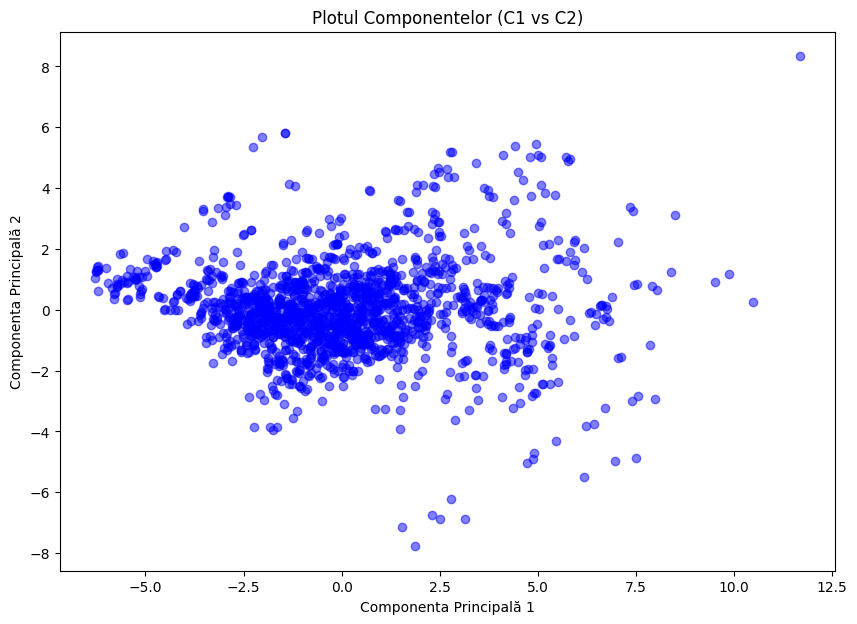

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(cDf['C1'], cDf['C2'], alpha=0.5, color='blue')
plt.title('Plotul Componentelor (C1 vs C2)')
plt.xlabel('Componenta Principală 1')
plt.ylabel('Componenta Principală 2');

### Corelograma Modelului (Heatmap)
Această matrice vizuală ne ajută să "etichetăm" componentele.
*   **Culorile intense (albastru închis)** indică o corelație pozitivă puternică. De exemplu, vedem că **C1** este puternic corelată cu *Power, Torque, Displacement, Weight*, deci putem spune că C1 este axa "Putere și Masivitate", pe când **C2** are corelație pozitivă cu *Top Speed* dar negativă puternică cu *Height* și *Cargo Volume*. Aceasta separă mașinile joase și rapide (Sport) de cele înalte și voluminoase (SUV-uri/Utilitare).
*   **Culorile roșii** indică o corelație inversă (ex: *Acceleration* are corelație negativă cu C1, ceea ce are sens: cu cât mașina e mai puternică/rapidă, cu atât timpul de accelerație scade).

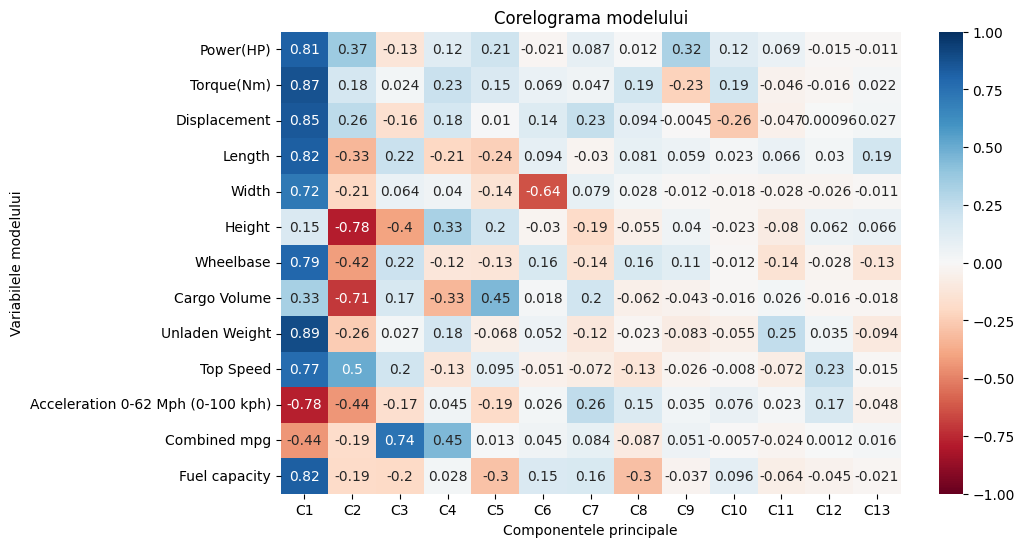

In [19]:
plt.figure(figsize=(10,6))
plt.title('Corelograma modelului')
sb.heatmap(rxcDf,vmin=-1,vmax=1,cmap='RdBu',center=0,annot=True)
plt.xlabel('Componentele principale')
plt.ylabel('Variabilele modelului');


### Corelograma Comunalităților Cumulate
Acest grafic ne arată "cât la sută" din fiecare variabilă este salvată/explicată pe măsură ce adăugăm componente.
*   **Zona Albastră Închis (valori ~1.0):** Indică faptul că acea variabilă este explicată aproape perfect. De exemplu, *Power, Torque, Weight* sunt explicate foarte bine încă de la C1.
*   **Zona Deschisă (Galben/Verzui):** Indică variabile care nu sunt bine reprezentate de primele componente. Vedem că *Height* și *Combined mpg* au valori mici pe C1 (0.022, 0.2), deci prima componentă nu le surprinde deloc. Ele au nevoie de C2 și C3 pentru a fi explicate corect.

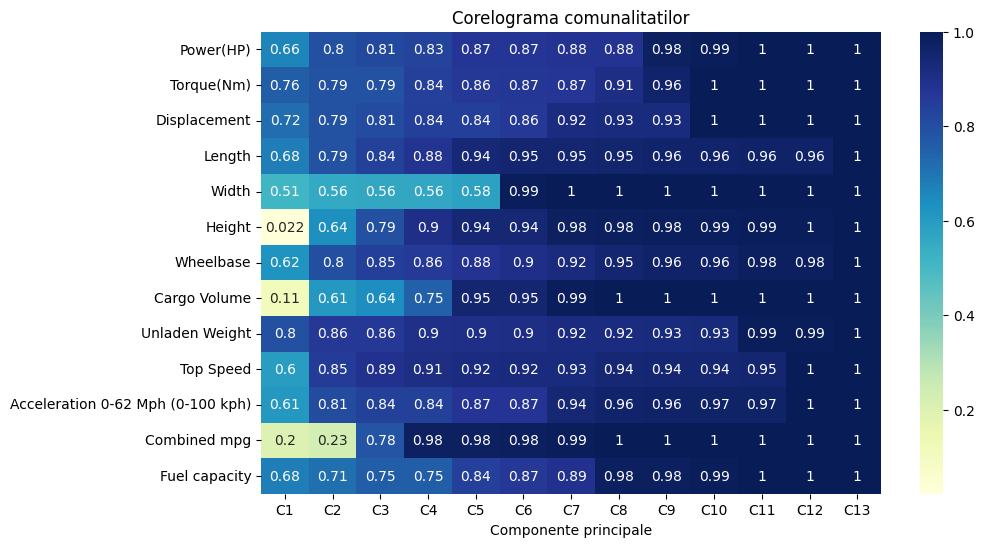

In [20]:
plt.figure(figsize=(10,6))
plt.title('Corelograma comunalitatilor')
sb.heatmap(comunalitatiDf,cmap='YlGnBu',annot=True)
plt.xlabel('Componente principale');

### Scree Plot (Selecția Numărului de Componente)
Acest grafic ne ajută să decidem câte axe păstrăm în analiză.
*   **Linia roșie întreruptă (Criteriul Kaiser):** Marchează pragul valorii 1. Orice componentă deasupra liniei este considerată semnificativă statistic.
*   **Concluzie:** Vedem că primele două componente sunt esențiale (valori mari), a treia este la limită (~ 1), iar restul scad sub prag, fiind considerate "zgomot" (informație redundantă).

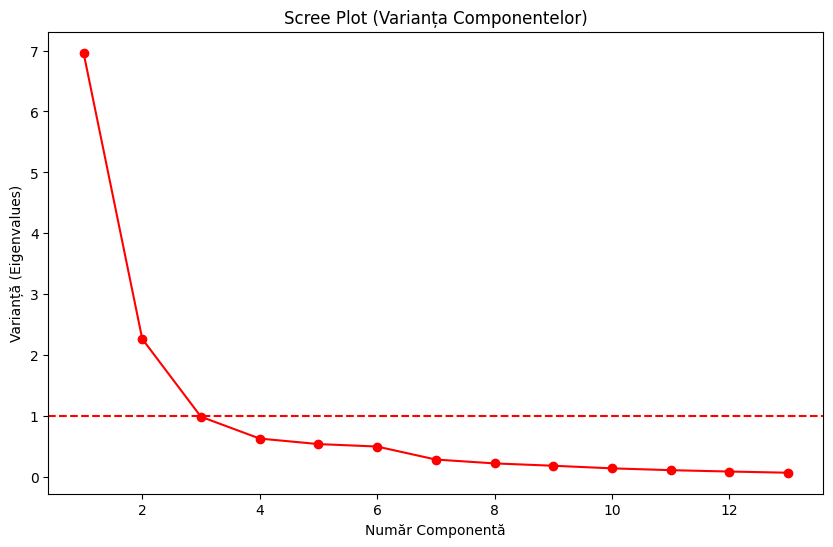

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,n+1),alpha,'ro-')
plt.title('Scree Plot (Varianța Componentelor)')
plt.xlabel('Număr Componentă')
plt.ylabel('Varianță (Eigenvalues)')
plt.axhline(y=1,linestyle='--',color='red');

### Cercul Corelațiilor
Vizualizează relațiile dintre variabile:
*   **Vectori apropiați (unghi mic):** Variabile corelate pozitiv (ex: *Power* și *Top Speed*).
*   **Vectori opuși (180 grade):** Variabile corelate negativ (ex: *Acceleration* vs. *Power*).
*   **Vectori ortogonali (90 grade):** Variabile necorelate (independente).
*   **Apropierea de cerc:** Cu cât săgeata e mai lungă (aproape de margine), cu atât variabila e mai bine reprezentată în acest plan.

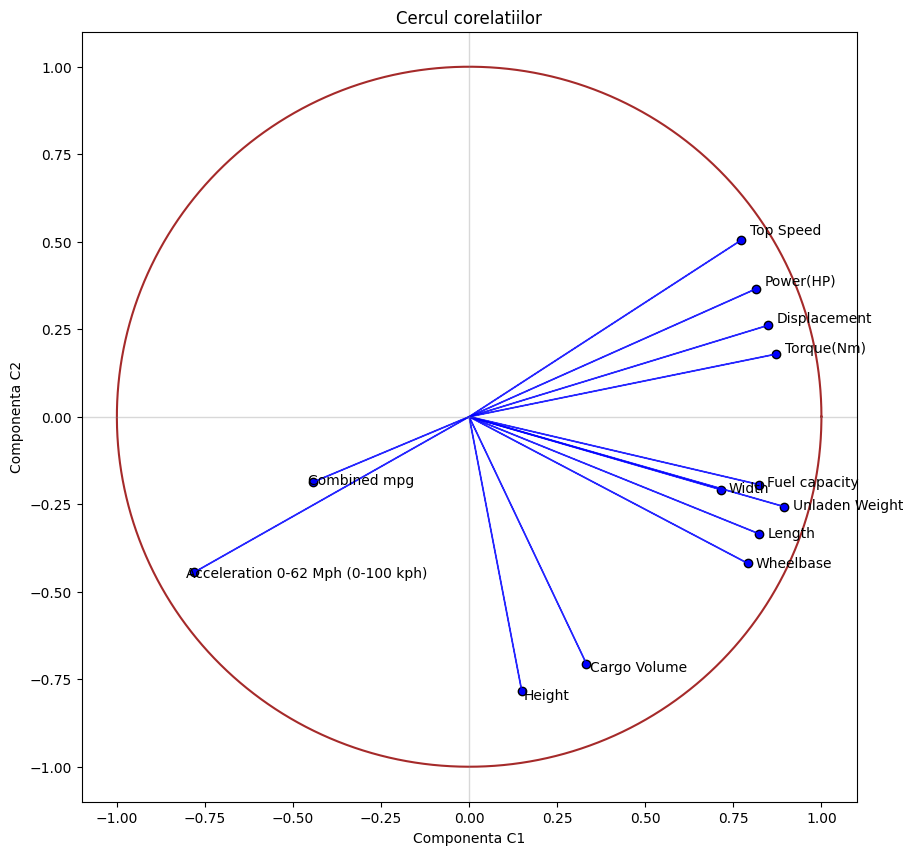

In [22]:
plt.figure(figsize=(10,10))
x_coord=r_x_c[:,0]
y_coord=r_x_c[:,1]

plt.title('Cercul corelatiilor')
plt.scatter(x_coord,y_coord,color='blue',edgecolors='black')

for i in range(len(variabile_numerice)):
    plt.arrow(0,0,x_coord[i],y_coord[i],color='blue',alpha=0.8)
    plt.annotate(variabile_numerice[i],(x_coord[i]*1.03,y_coord[i]*1.03))

theta=np.linspace(0,2*np.pi,500)
plt.plot(np.cos(theta),np.sin(theta),color='brown',linestyle='-')

plt.axhline(y=0,color='gray',lw=1,alpha=0.3)
plt.axvline(x=0,color='gray',lw=1,alpha=0.3)

plt.xlabel('Componenta C1')
plt.ylabel('Componenta C2')

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1);